In [13]:
#грузим датасет
import pandas as pd
dataframe = pd.read_csv('C://Users/Uldum/Downloads/data.csv', low_memory = False)

In [14]:
# смотрим поверхностно на данные. Видим разные типы данных + множество пропущенных значений.
dataframe.head(5)

,id,class,c1,c2,c3,c4,c5,c6,c7,c8,...,c53,c54,c55,c56,c57,c58,c59,c60,created_at,updated_at
0,1,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,647859449,1014559500,33652,-1898910370,левое,9,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,647859449,1017330063,33655,-645229505,левое,Не предъявляется,50.0,14,-699300431.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,647859449,1482170768,1017353208,-826554069,левое,Не предъявляется,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
dataframe['class'].value_counts()

545988074    15361
647859449       41
Name: class, dtype: int64

In [106]:
dataframe['c2'].value_counts()

1040736       15360
33655            24
33652             6
1017353208        6
1044374           5
0                 1
Name: c2, dtype: int64

In [107]:
dataframe['c3'].value_counts()

 0             15361
-645229505        24
-1898910370        6
-826554069         6
 634662849         5
Name: c3, dtype: int64

In [108]:
dataframe['c8'].value_counts()

 0.000000e+00    15360
-6.993004e+08       24
 9.531769e+08       12
 1.756160e+09        5
Name: c8, dtype: int64

In [109]:
dataframe['c9'].value_counts()

0             15361
438320836        24
1175637482        6
1204266630        6
466949963         5
Name: c9, dtype: int64

In [110]:
dataframe['c46'].value_counts()

30.0    15360
12.0       24
16.0       17
Name: c46, dtype: int64

In [111]:
dataframe['c48'].value_counts()

1.0    15400
3.0        1
Name: c48, dtype: int64

In [15]:
# продолжаем оценку данных. Колонок типа object - категориальных, довольно много. Есть колонка с id, нулевые колонки
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15403 non-null  int64  
 1   class       15403 non-null  int64  
 2   c1          15403 non-null  int64  
 3   c2          15403 non-null  int64  
 4   c3          15403 non-null  int64  
 5   c4          15403 non-null  object 
 6   c5          15401 non-null  object 
 7   c6          15401 non-null  float64
 8   c7          41 non-null     object 
 9   c8          15401 non-null  float64
 10  c9          15403 non-null  int64  
 11  c10         0 non-null      float64
 12  c11         0 non-null      float64
 13  c12         768 non-null    object 
 14  c13         0 non-null      float64
 15  c14         15401 non-null  object 
 16  c15         7683 non-null   object 
 17  c16         0 non-null      float64
 18  c17         15401 non-null  object 
 19  c18         15401 non-nul

In [16]:
#сбрасываем колонку с id
dataframe = dataframe.drop(['id'], axis=1)

In [17]:
# сбрасываем дубликаты строк
dataframe = dataframe.drop_duplicates()

In [18]:
# так как колонок с категориальными значениями много, то выберем парочку для обработки. Остальное отбросим. Нет смысла ради
# тестового задания терять столько времени. На оставшиеся данные применим алгоритм кластеризации.
# смотрим какие значения и сколько содержатся в колонке c4
dataframe['c4'].value_counts()

левое     15396
правое        6
Name: c4, dtype: int64

In [19]:
# смотрим на колонку c47. Заполнена одним и тем же значением. Бессмысленно. Уберём.
dataframe['c47'].value_counts()

16.0    15401
Name: c47, dtype: int64

In [20]:
# c43 туда же.
dataframe['c43'].value_counts()

18    15402
Name: c43, dtype: int64

In [21]:
# преобразуем колонку с категориальными значениями в нумерик. Используем встроенный метод библиотеки sckitlearn
from sklearn.preprocessing import OneHotEncoder
# создаём экземпляр класса энкодера
oe_style = OneHotEncoder()

In [22]:
# заполняем нужной колонкой переменную с энкодером, выводим массив значений 0 и 1 - левое и правое.
oe_results = oe_style.fit_transform(dataframe[["c4"]])
oe_results.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [23]:
# из массива получим датафрейм с колонками Left и right
pd.DataFrame(oe_results.toarray(), columns=['C4_l', 'c4_r']).head()

,C4_l,c4_r
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [24]:
# соединим полученный датафрейм с исходным датафреймом с помощью join. Выведем первые строки нового дф.
obj_df = dataframe.join(pd.DataFrame(oe_results.toarray(), columns=['C4_l', 'c4_r']))
obj_df.head()

,class,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c55,c56,c57,c58,c59,c60,created_at,updated_at,C4_l,c4_r
0,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,647859449,1014559500,33652,-1898910370,левое,9,50.0,14,9.531769e+08,1175637482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,647859449,1017330063,33655,-645229505,левое,Не предъявляется,50.0,14,-6.993004e+08,438320836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,647859449,1482170768,1017353208,-826554069,левое,Не предъявляется,50.0,14,9.531769e+08,1204266630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
5,647859449,-1568968858,1044374,634662849,правое,Не предъявляется,250.0,2242,1.756160e+09,466949963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [25]:
# сбросим категориальную колонку, которую преобразовали в числовые значения.
obj_df = obj_df.drop(['c4'], axis=1)
obj_df.head()

,class,c1,c2,c3,c5,c6,c7,c8,c9,c10,...,c55,c56,c57,c58,c59,c60,created_at,updated_at,C4_l,c4_r
0,545988074,0,0,0,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,647859449,1014559500,33652,-1898910370,9,50.0,14,9.531769e+08,1175637482,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,647859449,1017330063,33655,-645229505,Не предъявляется,50.0,14,-6.993004e+08,438320836,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,647859449,1482170768,1017353208,-826554069,Не предъявляется,50.0,14,9.531769e+08,1204266630,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
5,647859449,-1568968858,1044374,634662849,Не предъявляется,250.0,2242,1.756160e+09,466949963,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [26]:
# теперь взглянем на колонку c5. Не понятно, что это за значения. Но скорее всего какой-то ряд константных уровней, от 0 -
# Не предъявляется, до 100. Нужно перевести всё в числовую форму и заменить на 0 Не предъявляется.
obj_df['c5'].value_counts()

100                 7680
30                  6912
50                   768
Не предъявляется      35
9                      6
Name: c5, dtype: int64

In [ ]:
# Сначала посмотрим незаполненные значения в колонке. Видим 1 строку.

In [27]:
obj_df['c5'].isnull().sum()

1

In [28]:
# заполним эту строку наиболее часто встречающимся значением в колонке. В этом случае - 100.
obj_df['c5'] = obj_df['c5'].fillna(obj_df['c5'].value_counts().index[0])
obj_df.head()

,class,c1,c2,c3,c5,c6,c7,c8,c9,c10,...,c55,c56,c57,c58,c59,c60,created_at,updated_at,C4_l,c4_r
0,545988074,0,0,0,100,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,647859449,1014559500,33652,-1898910370,9,50.0,14,9.531769e+08,1175637482,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,647859449,1017330063,33655,-645229505,Не предъявляется,50.0,14,-6.993004e+08,438320836,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,647859449,1482170768,1017353208,-826554069,Не предъявляется,50.0,14,9.531769e+08,1204266630,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
5,647859449,-1568968858,1044374,634662849,Не предъявляется,250.0,2242,1.756160e+09,466949963,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [29]:
# теперь напишем примитивную функцию, которая будет принимать на входе текст,пытаться применить к нему числовой тип данных,
# а если потерпит неудачу, то возвратит 0. Так если мы встретим числа в формате строки, то они приобразуются в числа, 
# а если строку Не предъявляется, то заменим её на 0.
def cat_to_num(text):
  try:  
    return int(text)
  except:
    return 0

# применяем функцию к колонке методом apply. Смотрим значения в колонке.
obj_df['c5'] = obj_df['c5'].apply(cat_to_num)
obj_df['c5'].value_counts()

100    7681
30     6912
50      768
0        35
9         6
Name: c5, dtype: int64

In [30]:
# выведем инфу, посмотреть какие колонки ушли, какие появились, какие изменили тип
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15402 entries, 0 to 15402
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       15402 non-null  int64  
 1   c1          15402 non-null  int64  
 2   c2          15402 non-null  int64  
 3   c3          15402 non-null  int64  
 4   c5          15402 non-null  int64  
 5   c6          15401 non-null  float64
 6   c7          41 non-null     object 
 7   c8          15401 non-null  float64
 8   c9          15402 non-null  int64  
 9   c10         0 non-null      float64
 10  c11         0 non-null      float64
 11  c12         768 non-null    object 
 12  c13         0 non-null      float64
 13  c14         15401 non-null  object 
 14  c15         7683 non-null   object 
 15  c16         0 non-null      float64
 16  c17         15401 non-null  object 
 17  c18         15401 non-null  object 
 18  c19         0 non-null      float64
 19  c20         15401 non-nul

In [31]:
# На этом этапе я решил избавится от колонок типа object, которые не собираюсь преобразовывать.  Применим метод 
# select-exclude
# также сразу дропнем колонки с43, с47, в которых ранее обнаружили одинаковые значения
df = obj_df.select_dtypes(exclude=['object'])
df = df.drop(['c43', 'c47'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15402 entries, 0 to 15402
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       15402 non-null  int64  
 1   c1          15402 non-null  int64  
 2   c2          15402 non-null  int64  
 3   c3          15402 non-null  int64  
 4   c5          15402 non-null  int64  
 5   c6          15401 non-null  float64
 6   c8          15401 non-null  float64
 7   c9          15402 non-null  int64  
 8   c10         0 non-null      float64
 9   c11         0 non-null      float64
 10  c13         0 non-null      float64
 11  c16         0 non-null      float64
 12  c19         0 non-null      float64
 13  c21         0 non-null      float64
 14  c22         15401 non-null  float64
 15  c23         15402 non-null  float64
 16  c24         0 non-null      float64
 17  c25         0 non-null      float64
 18  c26         5 non-null      float64
 19  c28         5 non-null   

In [32]:
# посмотрим на пропущенные значения по всем колокам. Довольно много колонок состоит только из них.
df.isna().sum()

class             0
c1                0
c2                0
c3                0
c5                0
c6                1
c8                1
c9                0
c10           15402
c11           15402
c13           15402
c16           15402
c19           15402
c21           15402
c22               1
c23               0
c24           15402
c25           15402
c26           15397
c28           15397
c29           15402
c30           15402
c31           15402
c32               2
c33           15402
c34           15402
c35           15402
c36           15393
c37           15402
c38           15402
c39           15402
c40               1
c41           15393
c42           15402
c44           15402
c45           15402
c46               1
c48               1
c49           15360
c50           15384
c51           15391
c52           15402
c53           15402
c54               0
created_at    15402
updated_at    15402
C4_l              1
c4_r              1
dtype: int64

In [33]:
# уберём сначала строки axis=0 с хотя бы 1 незаполненным значением. таким образом, исходя из информации выше, мы уберём
# единичные пропуски из колонок, в которых большинство значений заполненны. Останутся только колонки с полностью незаполне
# нными строкам.
df=df.dropna(axis=0,how='any', subset=['c6', 'c8', 'c22', 'c32', 'C4_l', 'c4_r'])
df.isna().sum()

class             0
c1                0
c2                0
c3                0
c5                0
c6                0
c8                0
c9                0
c10           15399
c11           15399
c13           15399
c16           15399
c19           15399
c21           15399
c22               0
c23               0
c24           15399
c25           15399
c26           15395
c28           15395
c29           15399
c30           15399
c31           15399
c32               0
c33           15399
c34           15399
c35           15399
c36           15391
c37           15399
c38           15399
c39           15399
c40               0
c41           15391
c42           15399
c44           15399
c45           15399
c46               0
c48               0
c49           15359
c50           15382
c51           15389
c52           15399
c53           15399
c54               0
created_at    15399
updated_at    15399
C4_l              0
c4_r              0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15399 entries, 2 to 15401
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       15399 non-null  int64  
 1   c1          15399 non-null  int64  
 2   c2          15399 non-null  int64  
 3   c3          15399 non-null  int64  
 4   c5          15399 non-null  int64  
 5   c6          15399 non-null  float64
 6   c8          15399 non-null  float64
 7   c9          15399 non-null  int64  
 8   c10         0 non-null      float64
 9   c11         0 non-null      float64
 10  c13         0 non-null      float64
 11  c16         0 non-null      float64
 12  c19         0 non-null      float64
 13  c21         0 non-null      float64
 14  c22         15399 non-null  float64
 15  c23         15399 non-null  float64
 16  c24         0 non-null      float64
 17  c25         0 non-null      float64
 18  c26         4 non-null      float64
 19  c28         4 non-null   

In [35]:
# затем уберём столбцы, которые содержат хотя бы 1 Nan значение. В нашем случае это будут только колонки со всеми Nan.
df=df.dropna(axis=1,how='any')
df.isna().sum()

class    0
c1       0
c2       0
c3       0
c5       0
c6       0
c8       0
c9       0
c22      0
c23      0
c32      0
c40      0
c46      0
c48      0
c54      0
C4_l     0
c4_r     0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15399 entries, 2 to 15401
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   15399 non-null  int64  
 1   c1      15399 non-null  int64  
 2   c2      15399 non-null  int64  
 3   c3      15399 non-null  int64  
 4   c5      15399 non-null  int64  
 5   c6      15399 non-null  float64
 6   c8      15399 non-null  float64
 7   c9      15399 non-null  int64  
 8   c22     15399 non-null  float64
 9   c23     15399 non-null  float64
 10  c32     15399 non-null  float64
 11  c40     15399 non-null  float64
 12  c46     15399 non-null  float64
 13  c48     15399 non-null  float64
 14  c54     15399 non-null  int64  
 15  C4_l    15399 non-null  float64
 16  c4_r    15399 non-null  float64
dtypes: float64(10), int64(7)
memory usage: 2.1 MB


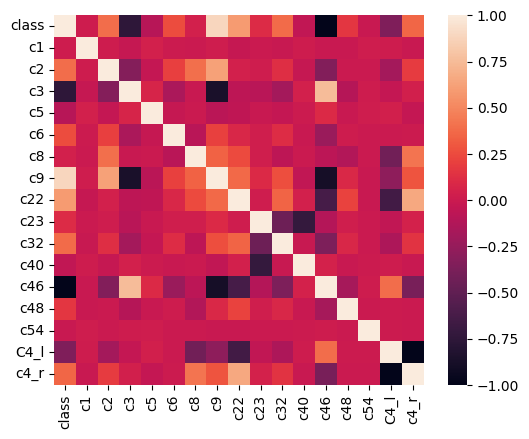

In [37]:
# обработку закончили, приступим к аналитической части. Построим тепловую карту корреляции значений разных колонок между
# собой. Чем светлее квадрат - тем больше корреляция между колонками
import seaborn as sns
cor = df.corr()
sns.heatmap(cor, square = True)
df_inf = df

In [38]:
# займёмся препроцесингом данных для лучшего применения алгоритма на них. Отмасштабируем и нормализуем данные.
# все данные будут иметь среднее значение в районе нуля, а отклонение от -1 до 1. Так проще алгоритму.
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [39]:
X_normalized = normalize(X_scaled)

In [40]:
# данные после препроцессинга
df = pd.DataFrame(X_normalized)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.322348,0.013608,-0.001149,-0.634223,-0.027194,-0.049804,0.328975,0.505971,0.002980,0.024959,-0.015068,-0.020094,-0.353457,-0.000133,-0.004487,0.000296,-0.000296
1,0.526609,0.022291,-0.001877,-0.351373,-0.051462,-0.081364,-0.394398,0.307418,0.064519,0.008359,-0.024616,-0.032827,-0.577430,-0.000217,-0.007330,0.000484,-0.000484
2,0.184666,0.011330,0.477333,-0.157945,-0.018046,-0.028532,0.188463,0.296929,0.007684,0.002931,-0.008632,-0.011511,-0.202488,-0.000076,-0.002570,-0.522910,0.522910
3,0.322180,0.013601,-0.001149,-0.633893,-0.027180,-0.049778,0.328803,0.505707,0.002978,0.040811,-0.015060,-0.020083,-0.353272,-0.000132,-0.004484,0.000296,-0.000296
4,0.321913,0.013590,-0.001148,-0.633367,-0.027158,-0.049737,0.328531,0.505288,0.002976,0.057619,-0.015047,-0.020067,-0.352979,-0.000132,-0.004481,0.000296,-0.000296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15394,-0.019262,0.425152,-0.007415,0.014595,0.375165,-0.384176,-0.000864,-0.017126,0.048427,-0.360608,0.331171,0.462960,0.019121,-0.003042,0.270397,0.006802,-0.006802
15395,-0.021272,0.028251,-0.008189,0.016119,0.414326,-0.424278,-0.000954,-0.018913,0.053482,-0.398249,0.365740,0.511285,0.021117,-0.003359,0.298622,0.007512,-0.007512
15396,-0.020863,0.460484,-0.008031,0.015808,0.406343,-0.005309,-0.000936,-0.018549,0.052451,-0.390576,0.358693,0.501434,0.020710,-0.003294,0.292868,0.007368,-0.007368
15397,-0.023491,0.031197,-0.009043,0.017800,0.457542,-0.005978,-0.001053,-0.020886,0.059060,-0.439788,0.403888,0.564614,0.023320,-0.003710,0.329769,0.008296,-0.008296


<AxesSubplot: >

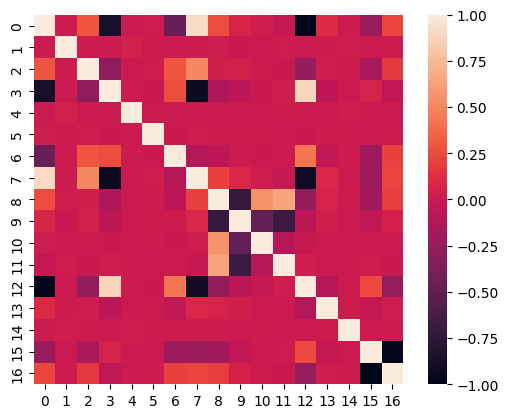

In [41]:
# на каком-то этапе решил ещё раз построить хитмап, чтобы убедится, что в основном корреляция осталась прежней.
cor = df.corr()
sns.heatmap(cor, square = True)

In [ ]:
# далее пойдём пометодам кластеризации. Начнём с ward. Сначала для поиска оптимального числа кластеров воспользуемся
# методом локтя. Затем построим дендрогрмму и визуально убедимся в правильности подхода. Потом рассчитаем метрику
# silhouette для каждого метода. -1 - плохо, 0 - кластеры накладываются друг на друга, 1 - хорошо.

In [ ]:
Метод ward

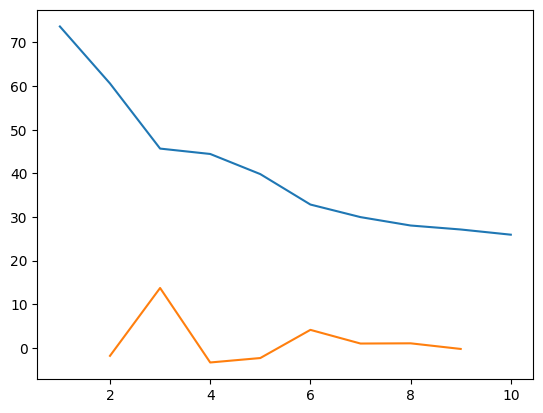

Рекомендованное количество кластеров: 3


In [32]:
# код отрисовки нагуглен. В целом, мы задаём метод и метрику, по которой определяется лучшее число кластеров.
# в остальном код не меняется. Метрику во всех методах будем использовать euclidean
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import *
import numpy as np
from scipy.spatial.distance import pdist
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='ward')
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

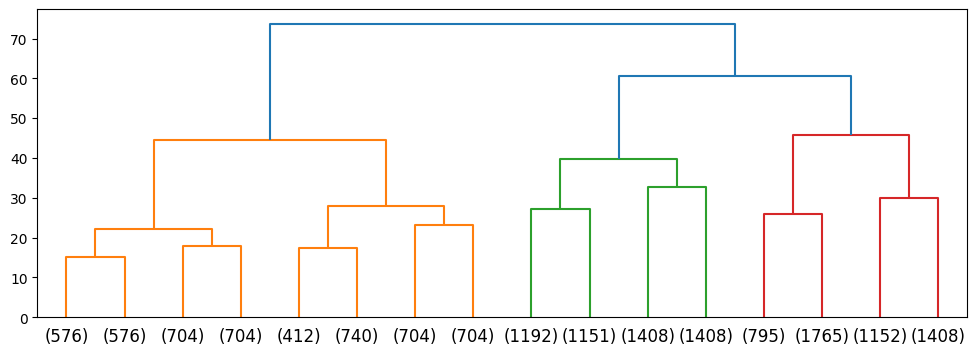

In [33]:
# локоть насчитал 3 кластера, построим дендрограмму тем же методом ward
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
dendro = sch.dendrogram(sch.linkage(df,method='ward'), p=3, truncate_mode='level')

In [34]:
# в принципе, видим что 3 кластера - это правильный выбор. выведем массив значнеий для каждого признака
nClust = 3
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [35]:
# посчтиаем очки силуэта.
from sklearn.metrics import silhouette_score
silhouette_score(df, clusters, metric='euclidean')

0.18315156917453768

In [36]:
# далее попробуем построить распределение кластеров по 2м осям - разным колонкам датафрейма. Зададим список колонок.
col = list(df.columns)
col

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

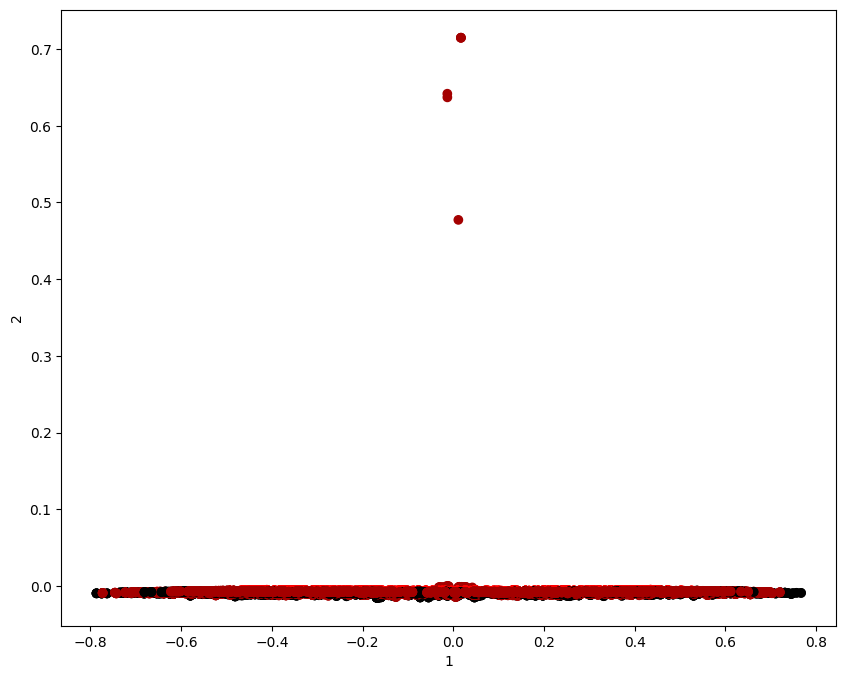

In [37]:
# тут просто меняем x и y на нужные нам оси-колонки.
x=1 
y=2 
plt.figure(figsize=(10, 8))
plt.scatter(df[x], df[y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [38]:
# график не очень информативен. Сформируем основные показатели колонок, в зависимости от кластера.
df_inf['I']=clusters
res=df_inf.groupby('I')[list(df_inf.columns)].mean()
res['Количество']=df_inf.groupby('I').size().values
res

C:\Users\Uldum\AppData\Local\Temp\ipykernel_876\1213295360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf['I']=clusters


,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c46,c48,c54,C4_l,c4_r,I,Количество
I,,,,,,,,,,,,,,,,,,,
1,5.459881e+08,-3.445901e+07,1.040736e+06,0.000000e+00,66.00000,200.000000,0.000000,0.000000e+00,1.500000,0.437500,1.5000,1.000000,30.000000,1.000000,2.859422e+08,1.000000,0.000000,1.0,5120
2,5.467779e+08,-2.661756e+07,2.216870e+06,-5.679326e+06,65.49215,201.928668,325557.448343,5.169010e+06,6.692964,0.126346,2.0283,2.490017,29.873619,1.000388,2.835802e+08,0.999031,0.000969,2.0,5159
3,5.459881e+08,1.019911e+07,1.040736e+06,0.000000e+00,66.00000,200.000000,0.000000,0.000000e+00,2.500000,0.242500,1.0000,2.500000,30.000000,1.000000,2.859422e+08,1.000000,0.000000,3.0,5120


In [39]:
# теперь выведем исходный датафрей, добавив к нему колонку с номером кластера, к которому принадлежит строка.
# возможно так более информативно, но в любом случае, не понимая что это за данные и откуда - это просто набор значений,
# которые алгоритм сгруппировал в кластеры по внутренней логике.
df_inf[df_inf['I']==3][list(df_inf.columns)]

,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c46,c48,c54,C4_l,c4_r,I
5163,545988074,1908851065,1040736,0,30,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,0,1.0,0.0,3
5164,545988074,-1948895452,1040736,0,30,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,1034116331,1.0,0.0,3
5165,545988074,-1948895452,1040736,0,50,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,1034116331,1.0,0.0,3
5166,545988074,1221946338,1040736,0,30,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751703,1.0,0.0,3
5167,545988074,1221946338,1040736,0,30,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751703,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,545988074,360933704,1040736,0,100,150.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,1034116331,1.0,0.0,3
12839,545988074,1258568978,1040736,0,100,200.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,1034116331,1.0,0.0,3
12840,545988074,360933704,1040736,0,100,200.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,1034116331,1.0,0.0,3
12841,545988074,1258568978,1040736,0,100,200.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,1034116331,1.0,0.0,3


In [ ]:
Метод average

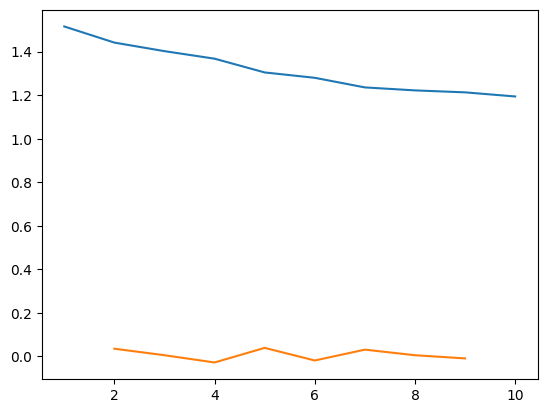

Рекомендованное количество кластеров: 5


In [40]:
# Всё то же самое, что с ward, только другой метод, другое кол-во кластеров.
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='average')
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

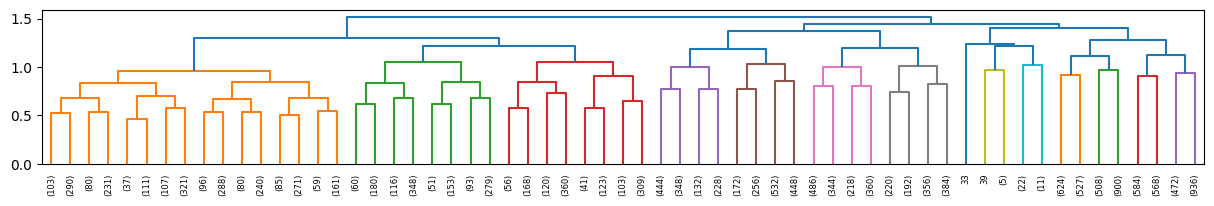

In [41]:
plt.figure(figsize = (15,2))
dendro = sch.dendrogram(sch.linkage(df,method='average'), p=5, truncate_mode='level')

In [42]:
# 5 кластеров по локтю, 5 по дендрограмме
nClust = 5
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([4, 4, 4, ..., 5, 5, 5], dtype=int32)

In [43]:
# силуэт лучше, чем в ward
silhouette_score(df, clusters, metric='euclidean')

0.18931325043248673

In [ ]:
Метод complete

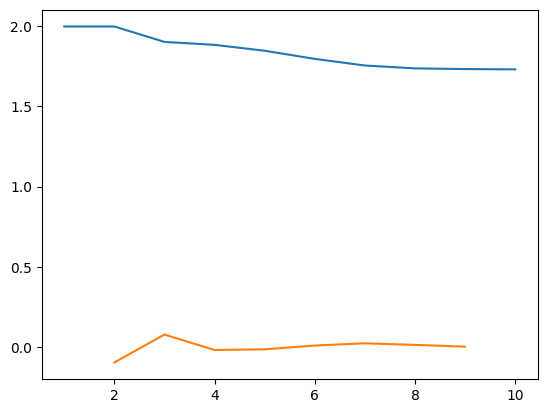

Рекомендованное количество кластеров: 3


In [44]:
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='complete')
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

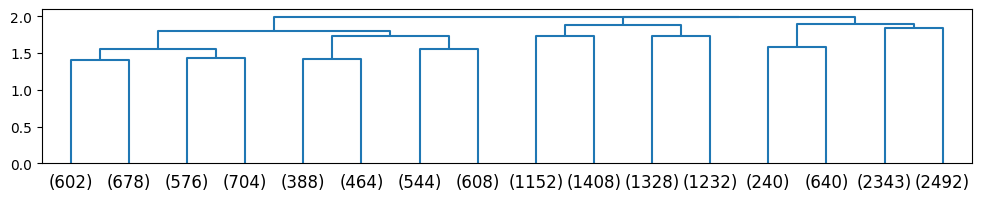

In [45]:
plt.figure(figsize = (12,2))
dendro = sch.dendrogram(sch.linkage(df,method='complete'), p=3, truncate_mode='level')

In [46]:
nClust = 3
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [47]:
silhouette_score(df, clusters, metric='euclidean')

0.1726201936217825

In [ ]:
Метод single

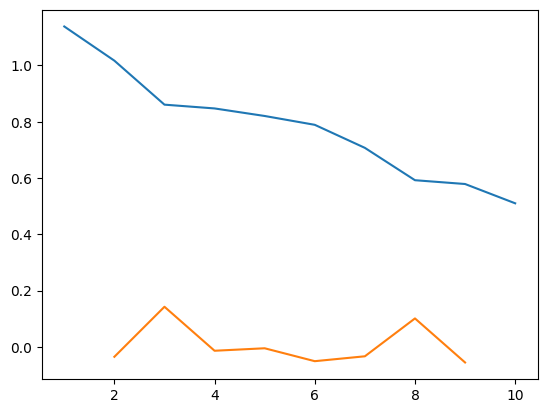

Рекомендованное количество кластеров: 3


In [48]:
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='single')
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

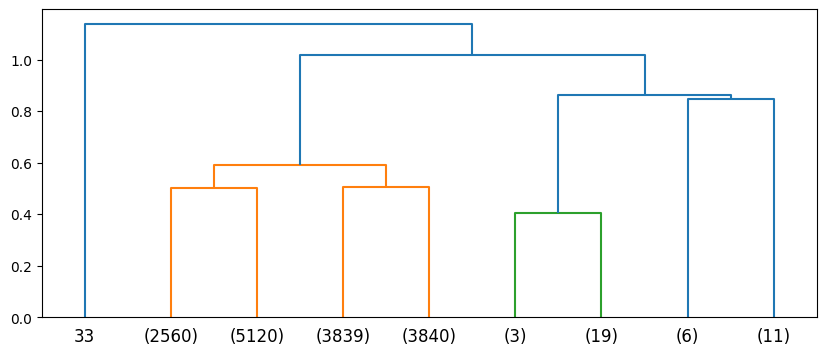

In [49]:
plt.figure(figsize = (10,4))
dendro = sch.dendrogram(sch.linkage(df,method='single'), p=3, truncate_mode='level')

In [50]:
nClust = 3
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [51]:
# худший силуэт.
silhouette_score(df, clusters, metric='euclidean')

0.032085281233516644

In [ ]:
Небольшой вывод: по-хорошему нужно построить несколько дендрограмм для каждого метода с разным числом кластеров
    и по каждому кейсу смотреть силуэты. Но, это вне рамок данного таска. Поэтому метод average с числом кластеров
    5 - лучший.

In [60]:
pdist_metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']

In [50]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from sklearn.metrics import silhouette_score

In [62]:
sil_scores = []
for i in pdist_metrics:
    data_dist = pdist(df, metric=i)
    data_linkage = linkage(data_dist, method='ward')
    nClust = 3
    clusters=fcluster(data_linkage, nClust, criterion='maxclust')
    print(i, silhouette_score(df, clusters, metric=i), sep=': ')
    


braycurtis: 0.3645725374853735
canberra: 0.26179733350468865
chebyshev: 0.10815456961638438
cityblock: 0.26147736974124486
correlation: 0.31019677121786404
cosine: 0.3017726843901456


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [64]:
pdist_metr = ['euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']

for i in pdist_metr:
    try:
        data_dist = pdist(df, metric=i)
        data_linkage = linkage(data_dist, method='ward')
        nClust = 3
        clusters=fcluster(data_linkage, nClust, criterion='maxclust')
        print(i, silhouette_score(df, clusters, metric=i), sep=': ')
    except:
        print(i, 'error')

euclidean: 0.18315156917453768
hamming: 0.0009086350226401303


C:\Users\Uldum\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Uldum\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


jaccard: 0.0
jensenshannon error
kulczynski1 error
mahalanobis error


C:\Users\Uldum\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\Uldum\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


matching: 0.0
minkowski: 0.18315156917453762
rogerstanimoto error
russellrao error
seuclidean: 0.924313864652663
sokalmichener error
sokalsneath error
sqeuclidean: 0.3017726843901455
yule error


In [65]:
dist_metric = 'seuclidean'
nClust = 3
f_cl_criterion='maxclust'
link_meths = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']


for i in link_meths:
    try:
        data_dist = pdist(df, metric=dist_metric)
        data_linkage = linkage(data_dist, method=i)
        nClust = nClust
        clusters=fcluster(data_linkage, nClust, criterion=f_cl_criterion)
        print(i, silhouette_score(df, clusters, metric=dist_metric), sep=': ')
    except:
        print(i, 'error')

single: 0.9511646515576618
complete: 0.9511646515576618
average: 0.9511646515576618
weighted: 0.9511646515576618
centroid: 0.9511646515576618
median: 0.9511646515576618
ward: 0.924313864652663


In [66]:
dist_metric = 'seuclidean'
link_meth = 'average'
nClusts = [3, 4, 5, 6, 7, 10, 12, 14, 20, 30, 40, 50, 100, 200]
f_cl_criterion='maxclust'


for i in nClusts:
    try:
        data_dist = pdist(df, metric=dist_metric)
        data_linkage = linkage(data_dist, method=link_meth)
        clusters=fcluster(data_linkage, i, criterion=f_cl_criterion)
        print(i, silhouette_score(df, clusters, metric=dist_metric), sep=': ')
    except:
        print(i, 'error')

3: 0.9511646515576618
4: 0.9362972169836609
5: 0.925167996711805
6: 0.9155164169442525
7: 0.9154524516381668
10: 0.9046247655586804
12: 0.8908219522690792
14: 0.8908019726538559
20: 0.22214294575477803
30: 0.21895712491462244
40: 0.232176298710738
50: 0.2557864247894343
100: 0.33760305423654746
200: 0.4318856468332352


In [67]:
dist_metric = 'seuclidean'
link_meth = 'average'
nClusts = 3
f_cl_criterions=['maxclust', 'inconsistent', 'distance', 'monocrit', 'maxclust_monocrit']


for i in f_cl_criterions:
    try:
        data_dist = pdist(df, metric=dist_metric)
        data_linkage = linkage(data_dist, method=link_meth)
        clusters=fcluster(data_linkage, nClusts, criterion=i)
        print(i, silhouette_score(df, clusters, metric=dist_metric), sep=': ')
    except:
        print(i, 'error')

maxclust: 0.9511646515576618
inconsistent error
distance: 0.22982593196725296
monocrit error
maxclust_monocrit error


In [74]:
dist_metric = 'seuclidean'
link_meth = 'average'
nClusts = 100
f_cl_criterion='maxclust'

data_dist = pdist(df, metric=dist_metric)
data_linkage = linkage(data_dist, method=link_meth)
clusters=fcluster(data_linkage, nClusts, criterion=f_cl_criterion)
print(silhouette_score(df, clusters, metric=dist_metric))

0.33760305423654746


In [89]:
df_inf['I']=clusters
res=df_inf.groupby('I')[list(df_inf.columns)].mean()
res['Количество']=df_inf.groupby('I').size().values
res.sort_values('Количество', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None).tail(20)

,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c46,c48,c54,C4_l,c4_r,I,Количество
I,,,,,,,,,,,,,,,,,,,
63,545988074.0,1.475436e+09,1.040736e+06,0.000000e+00,100.0,250.0,0.000000e+00,0.000000e+00,2.000000,0.287073,2.000000,1.000000,30.0,1.0,1.292304e+09,1.0,0.0,63.0,41
9,647859449.0,9.377950e+08,3.365500e+04,-6.452295e+08,0.0,50.0,-6.993004e+08,4.383208e+08,49.000000,0.322857,7.000000,1.000000,16.0,1.0,0.000000e+00,1.0,0.0,9.0,7
7,647859449.0,1.138567e+09,3.365200e+04,-1.898910e+09,9.0,50.0,9.531769e+08,1.175637e+09,9.000000,0.913333,1.000000,1.000000,12.0,1.0,0.000000e+00,1.0,0.0,7.0,6
5,647859449.0,1.482174e+09,1.017353e+09,-8.265541e+08,0.0,50.0,9.531769e+08,1.204267e+09,49.000000,0.320000,7.000000,1.000000,16.0,1.0,0.000000e+00,1.0,0.0,5.0,3
16,647859449.0,1.472583e+09,3.365500e+04,-6.452295e+08,0.0,1000.0,-6.993004e+08,4.383208e+08,151.666667,0.646667,6.333333,1.333333,12.0,1.0,0.000000e+00,1.0,0.0,16.0,3
8,647859449.0,1.472476e+09,3.365500e+04,-6.452295e+08,0.0,2000.0,-6.993004e+08,4.383208e+08,65.333333,0.580000,7.000000,1.333333,16.0,1.0,0.000000e+00,1.0,0.0,8.0,3
15,647859449.0,-5.745597e+08,3.365500e+04,-6.452295e+08,0.0,500.0,-6.993004e+08,4.383208e+08,259.000000,0.766667,7.000000,1.000000,12.0,1.0,0.000000e+00,1.0,0.0,15.0,3
1,647859449.0,-1.566779e+09,1.044374e+06,6.346628e+08,0.0,250.0,1.756160e+09,4.669500e+08,1026.000000,0.730000,8.000000,1.000000,12.0,1.0,0.000000e+00,0.0,1.0,1.0,2
6,647859449.0,-1.297342e+09,1.017353e+09,-8.265541e+08,0.0,2000.0,9.531769e+08,1.204267e+09,49.000000,0.580000,4.000000,1.000000,16.0,1.0,0.000000e+00,1.0,0.0,6.0,2


In [97]:
clust_list = list(res.loc[res['Количество'] > 40]['I'])

In [104]:
df_it_1 = df_inf.loc[df_inf['I'].isin(clust_list)]
df_it_1

,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c46,c48,c54,C4_l,c4_r,I
43,545988074,-578661768,1040736,0,30,250.0,0.0,0,1.0,0.50,1.0,1.0,30.0,1.0,0,1.0,0.0,52
44,545988074,-141440989,1040736,0,30,250.0,0.0,0,1.0,0.50,1.0,1.0,30.0,1.0,1034116331,1.0,0.0,51
45,545988074,-141440989,1040736,0,50,250.0,0.0,0,1.0,0.50,1.0,1.0,30.0,1.0,1034116331,1.0,0.0,51
46,545988074,-1265566495,1040736,0,30,250.0,0.0,0,1.0,0.50,1.0,1.0,30.0,1.0,-440751703,1.0,0.0,52
47,545988074,-1265566495,1040736,0,30,250.0,0.0,0,1.0,0.50,1.0,1.0,30.0,1.0,-440751703,1.0,0.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,545988074,1387651697,1040736,0,100,150.0,0.0,0,6.0,0.11,2.0,3.0,30.0,1.0,1034116331,1.0,0.0,36
15398,545988074,67530697,1040736,0,100,150.0,0.0,0,6.0,0.11,2.0,3.0,30.0,1.0,1034116331,1.0,0.0,36
15399,545988074,1387651697,1040736,0,100,200.0,0.0,0,6.0,0.11,2.0,3.0,30.0,1.0,1034116331,1.0,0.0,36
15400,545988074,67530697,1040736,0,100,200.0,0.0,0,6.0,0.11,2.0,3.0,30.0,1.0,1034116331,1.0,0.0,36


In [190]:
# c5=100 , c54=-440751703 , c32=1.0 , c6=250.0
df_it_1.loc[df_it_1['I']==79]

,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c46,c48,c54,C4_l,c4_r,I
5478,545988074,-897374381,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751840,1.0,0.0,79
5479,545988074,-897374381,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751840,1.0,0.0,79
5489,545988074,-1544337666,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751703,1.0,0.0,79
5490,545988074,-1544337666,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751703,1.0,0.0,79
5497,545988074,-2048800985,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751840,1.0,0.0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,545988074,-537384342,1040736,0,100,250.0,0.0,0,2.0,0.33,1.0,2.0,30.0,1.0,-440751840,1.0,0.0,79
7519,545988074,-537384342,1040736,0,100,250.0,0.0,0,2.0,0.33,1.0,2.0,30.0,1.0,-440751840,1.0,0.0,79
7526,545988074,-493266992,1040736,0,100,250.0,0.0,0,2.0,0.33,1.0,2.0,30.0,1.0,0,1.0,0.0,79
7531,545988074,-1393684669,1040736,0,100,250.0,0.0,0,2.0,0.33,1.0,2.0,30.0,1.0,-718884441,1.0,0.0,79


In [180]:
# строка для будущего запроса - взять флюбые фичи из кластера, как бы поступил пользователь
# c5=100 , c54=-440751703 , c32=1.0 , c6=250.0, c22=2.0, c1=2028392604
df_it_1.loc[df_it_1['I']==80]

,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c46,c48,c54,C4_l,c4_r,I
5467,545988074,1941798963,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,0,1.0,0.0,80
5470,545988074,2028392604,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751703,1.0,0.0,80
5471,545988074,2028392604,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751703,1.0,0.0,80
5472,545988074,1812040166,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-718884441,1.0,0.0,80
5473,545988074,1812040166,1040736,0,100,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-718884441,1.0,0.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,545988074,5551351,1040736,0,100,250.0,0.0,0,2.0,0.33,1.0,2.0,30.0,1.0,-416966437,1.0,0.0,80
7537,545988074,520955632,1040736,0,100,250.0,0.0,0,2.0,0.33,1.0,2.0,30.0,1.0,-440751840,1.0,0.0,80
7538,545988074,520955632,1040736,0,100,250.0,0.0,0,2.0,0.33,1.0,2.0,30.0,1.0,-440751840,1.0,0.0,80
7539,545988074,1034947491,1040736,0,100,250.0,0.0,0,2.0,0.33,1.0,2.0,30.0,1.0,-1339337773,1.0,0.0,80


In [181]:
# c5=100 , c54=-440751703 , c32=1.0 , c6=250.0
df_it_1.loc[df_it_1['I']==81]

,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c46,c48,c54,C4_l,c4_r,I
10587,545988074,134344500,1040736,0,100,250.0,0.0,0,3.0,0.17,1.0,3.0,30.0,1.0,0,1.0,0.0,81
10590,545988074,220938141,1040736,0,100,250.0,0.0,0,3.0,0.17,1.0,3.0,30.0,1.0,-440751703,1.0,0.0,81
10591,545988074,220938141,1040736,0,100,250.0,0.0,0,3.0,0.17,1.0,3.0,30.0,1.0,-440751703,1.0,0.0,81
10592,545988074,4585703,1040736,0,100,250.0,0.0,0,3.0,0.17,1.0,3.0,30.0,1.0,-718884441,1.0,0.0,81
10593,545988074,4585703,1040736,0,100,250.0,0.0,0,3.0,0.17,1.0,3.0,30.0,1.0,-718884441,1.0,0.0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,545988074,1513103160,1040736,0,100,250.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,-416966437,1.0,0.0,81
12657,545988074,2028507441,1040736,0,100,250.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,-440751840,1.0,0.0,81
12658,545988074,2028507441,1040736,0,100,250.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,-440751840,1.0,0.0,81
12659,545988074,-1752467996,1040736,0,100,250.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,-1339337773,1.0,0.0,81


<AxesSubplot: >

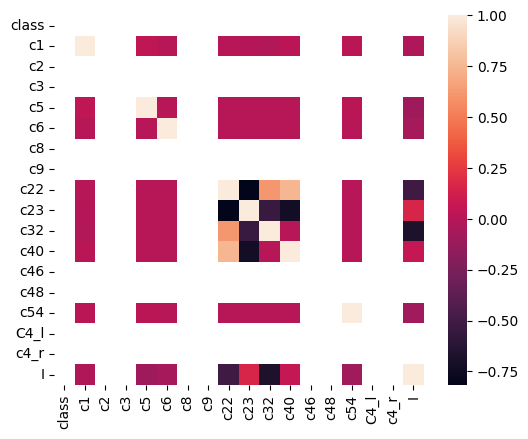

In [103]:
cor = df_it_1.corr()
sns.heatmap(cor, square = True)

<AxesSubplot: >

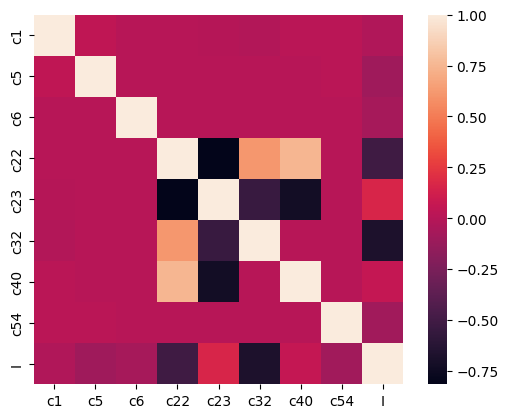

In [114]:
df_it_2 = df_it_1.drop(['class', 'c2', 'c3', 'c8', 'c9', 'c46', 'c48', 'C4_l', 'c4_r'], axis=1)
cor = df_it_2.corr()
sns.heatmap(cor, square = True)

<AxesSubplot: >

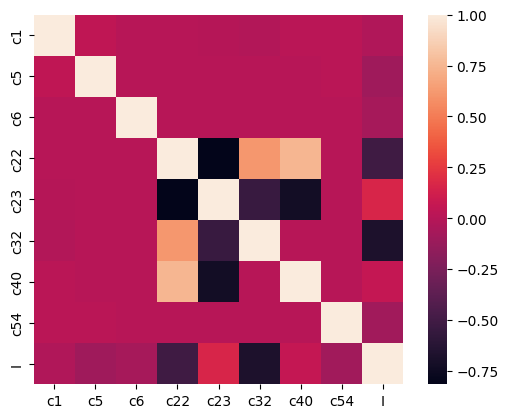

In [116]:
from sklearn.ensemble import ExtraTreesClassifier
norm_df_2=(df_it_2-df_it_2.min())/(df_it_2.max()-df_it_2.min())
cor = norm_df_2.corr()
sns.heatmap(cor, square = True)

In [117]:
norm_df_2

,c1,c5,c6,c22,c23,c32,c40,c54,I
43,0.365019,0.000000,1.0,0.0,0.711864,0.0,0.0,0.449663,0.4250
44,0.467027,0.000000,1.0,0.0,0.711864,0.0,0.0,0.796853,0.4125
45,0.467027,0.285714,1.0,0.0,0.711864,0.0,0.0,0.796853,0.4125
46,0.204759,0.000000,1.0,0.0,0.711864,0.0,0.0,0.301687,0.4250
47,0.204759,0.000000,1.0,0.0,0.711864,0.0,0.0,0.301687,0.4250
...,...,...,...,...,...,...,...,...,...
15397,0.823777,1.000000,0.0,1.0,0.050847,1.0,1.0,0.796853,0.2250
15398,0.515781,1.000000,0.0,1.0,0.050847,1.0,1.0,0.796853,0.2250
15399,0.823777,1.000000,0.5,1.0,0.050847,1.0,1.0,0.796853,0.2250
15400,0.515781,1.000000,0.5,1.0,0.050847,1.0,1.0,0.796853,0.2250


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df_it_2.drop(['I'], axis = 1) 
y = df_it_2.I         
X=(X-X.min())/(X.max()-X.min())
y  

43       52
44       51
45       51
46       52
47       52
         ..
15397    36
15398    36
15399    36
15400    36
15401    36
Name: I, Length: 15359, dtype: int32

In [134]:
X

,c1,c5,c6,c22,c23,c32,c40,c54
43,0.365019,0.000000,1.0,0.0,0.711864,0.0,0.0,0.449663
44,0.467027,0.000000,1.0,0.0,0.711864,0.0,0.0,0.796853
45,0.467027,0.285714,1.0,0.0,0.711864,0.0,0.0,0.796853
46,0.204759,0.000000,1.0,0.0,0.711864,0.0,0.0,0.301687
47,0.204759,0.000000,1.0,0.0,0.711864,0.0,0.0,0.301687
...,...,...,...,...,...,...,...,...
15397,0.823777,1.000000,0.0,1.0,0.050847,1.0,1.0,0.796853
15398,0.515781,1.000000,0.0,1.0,0.050847,1.0,1.0,0.796853
15399,0.823777,1.000000,0.5,1.0,0.050847,1.0,1.0,0.796853
15400,0.515781,1.000000,0.5,1.0,0.050847,1.0,1.0,0.796853


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

In [121]:
extc = ExtraTreesClassifier(n_estimators=100,max_features= 168,criterion= 'entropy',min_samples_split= 3,
                            max_depth= 30, min_samples_leaf= 8)      
extc.fit(X,y)

ExtraTreesClassifier(criterion='entropy', max_depth=30, max_features=168,
                     min_samples_leaf=8, min_samples_split=3)

<AxesSubplot: >

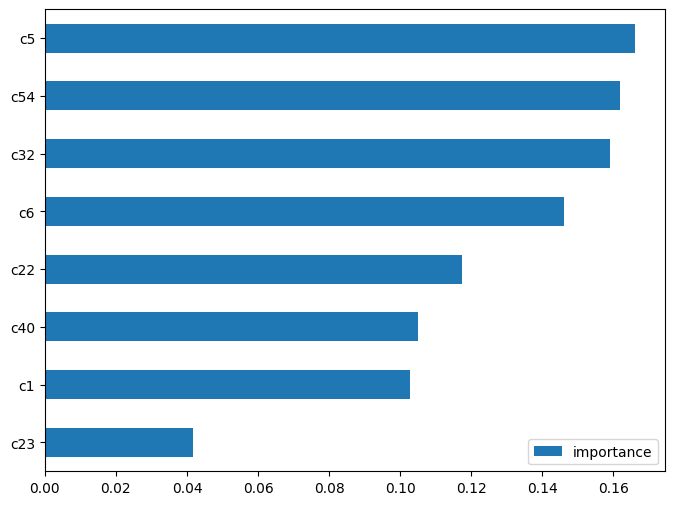

In [124]:
imp = pd.DataFrame(extc.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 6))

In [125]:
feature_importances_df = pd.DataFrame({'features': list(X), 'feature_importances': extc.feature_importances_})
fi_df_sort = feature_importances_df.sort_values('feature_importances', ascending = False)
fi_df_sort

,features,feature_importances
1,c5,0.166170
7,c54,0.161971
5,c32,0.158936
2,c6,0.146065
3,c22,0.117440
6,c40,0.105053
0,c1,0.102766
4,c23,0.041599


In [136]:
prediction_of_probability = extc.predict_proba(X_test)

In [143]:
pd.DataFrame(prediction_of_probability).tail()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
1531,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1532,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.003333,0.996667,0.0,0.0,0.0,0.0,0.0
1533,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1534,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1535,0.0,0.992857,0.0,0.0,0.0,0.0,0.0,0.0,0.007143,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [191]:
X = df_it_2.drop(['I', 'c40', 'c23'], axis = 1) 
y = df_it_2.I         
X=(X-X.min())/(X.max()-X.min())
y 

43       52
44       51
45       51
46       52
47       52
         ..
15397    36
15398    36
15399    36
15400    36
15401    36
Name: I, Length: 15359, dtype: int32

In [192]:
X

,c1,c5,c6,c22,c32,c54
43,0.365019,0.000000,1.0,0.0,0.0,0.449663
44,0.467027,0.000000,1.0,0.0,0.0,0.796853
45,0.467027,0.285714,1.0,0.0,0.0,0.796853
46,0.204759,0.000000,1.0,0.0,0.0,0.301687
47,0.204759,0.000000,1.0,0.0,0.0,0.301687
...,...,...,...,...,...,...
15397,0.823777,1.000000,0.0,1.0,1.0,0.796853
15398,0.515781,1.000000,0.0,1.0,1.0,0.796853
15399,0.823777,1.000000,0.5,1.0,1.0,0.796853
15400,0.515781,1.000000,0.5,1.0,1.0,0.796853


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15)

In [194]:
extc2 = ExtraTreesClassifier(n_estimators=100,max_features= 168,criterion= 'entropy',min_samples_split= 3,
                            max_depth= 30, min_samples_leaf= 8)      
extc2.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=30, max_features=168,
                     min_samples_leaf=8, min_samples_split=3)

In [196]:
#Features c5 , c54 , c32 , c6, c22, c1
cust_dict = {'c1':[2028392604], 'c5':[100], 'c6':[250.0], 'c22':[2.0], 'c32':[1.0], 'c54':[-440751703]}
cust_req = pd.DataFrame.from_dict(cust_dict)

In [197]:
X_min_max = df_it_2.drop(['I', 'c40', 'c23'], axis = 1)
cust_req_X = (cust_req-X_min_max.min())/(X_min_max.max()-X_min_max.min())
cust_req_X

,c1,c5,c6,c22,c32,c54
0,0.973267,1.0,1.0,0.2,0.0,0.301687


In [198]:
extc2.predict(cust_req_X)

array([80], dtype=int32)

In [200]:
#кластер был выбран по 6 фильтрам, сократив число позиций с 15000 до 112
#дальше вторая итерация: разбиение кластера на подкластеры, обучение модели, выделение значимых признаков через
#оценку весов и выведение этих признаков в качестве фильтров.
#!!!ВАЖНО!!! убрать признаки из прошлой итерации, а также столбца I
df_it_1.loc[df_it_1['I']==80].drop(['I', 'c1', 'c5', 'c6', 'c22', 'c32', 'c54'], axis = 1)

,class,c2,c3,c8,c9,c23,c40,c46,c48,C4_l,c4_r
5467,545988074,1040736,0,0.0,0,0.25,2.0,30.0,1.0,1.0,0.0
5470,545988074,1040736,0,0.0,0,0.25,2.0,30.0,1.0,1.0,0.0
5471,545988074,1040736,0,0.0,0,0.25,2.0,30.0,1.0,1.0,0.0
5472,545988074,1040736,0,0.0,0,0.25,2.0,30.0,1.0,1.0,0.0
5473,545988074,1040736,0,0.0,0,0.25,2.0,30.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7536,545988074,1040736,0,0.0,0,0.33,2.0,30.0,1.0,1.0,0.0
7537,545988074,1040736,0,0.0,0,0.33,2.0,30.0,1.0,1.0,0.0
7538,545988074,1040736,0,0.0,0,0.33,2.0,30.0,1.0,1.0,0.0
7539,545988074,1040736,0,0.0,0,0.33,2.0,30.0,1.0,1.0,0.0


In [ ]:
С каждым шагом мы снижаем кол-во фильтров, выдаём пользователю наиболее весомые признаки, снижаем число сэмплов по данным. 
Когда число строк в кластере достигнет нужного количества - пользователь найдёт товар.
Если число фильтров превысит максимум, а товар не будет найден, то целесообразно использовать заполненные фильтры для
поиска по всей БД SQL-запросом, а не только по выделенному кластеру.

Проблема в том, что пользователь должен заполнить все выданные фильтры. Иначе модель не сможет предсказать кластер, потому
что ей вернутся неполняе данные. Либо модель придётся переобучать с учётом незаполненных фильтров, либо выдавать следующие 
по весу фильтры, вместо незаполненных и также переобучать модель.

